# AI Community Hangout - 2020-08-05

We'll go through the basics of building the following Neural Network in PyTorch as well as some useful hints in the process:

![](nn.png)

Make sure to have `pytorch` and `torchsummary` installed:

In [1]:
!conda install pytorch -c pytorch && pip install torchsummary

Solving environment: done

# All requested packages already installed.



Autoreload modules in IPython by inserting:

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from torchsummary import summary
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Define random seed for reproducibility
seed = 0
np.random.seed(seed)
torch.manual_seed(seed);

In [5]:
N, D_in, D_H1, D_H2, D_out = 16384, 37, 64, 64, 4

In [6]:
from model import Model

model = Model(D_in, D_H1, D_H2, D_out)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

In [7]:
summary(model, (D_in,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 64]           2,432
       BatchNorm1d-2                   [-1, 64]             128
              ReLU-3                   [-1, 64]               0
            Linear-4                   [-1, 64]           4,160
       BatchNorm1d-5                   [-1, 64]             128
              ReLU-6                   [-1, 64]               0
            Linear-7                    [-1, 4]             260
Total params: 7,108
Trainable params: 7,108
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.03
Estimated Total Size (MB): 0.03
----------------------------------------------------------------


In [8]:
# Create random arrays to hold inputs and outputs
# Not so much focus in the problem, but in the approach :)
X = np.random.randn(N, D_in)
y = np.random.randn(N, D_out)

In [9]:
X_train, X_test, y_train, y_test = map(torch.Tensor, train_test_split(X, y, test_size=0.2, random_state=seed))

In [10]:
dataset = TensorDataset(X_train, y_train) # create pytorch datset
train_loader = DataLoader(dataset, batch_size=32) # create dataloader

In [11]:
losses = []
for x, y_true in train_loader:
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x)

    # Compute and print loss
    loss = criterion(y_pred, y_true)
    losses.append(loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

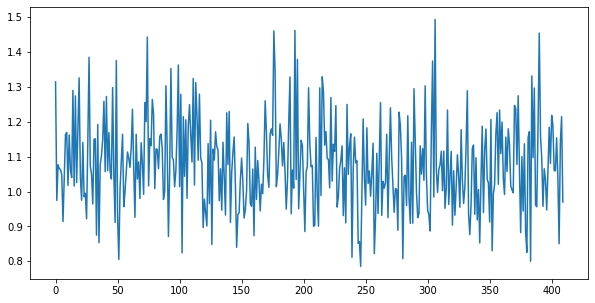

In [12]:
plt.figure(figsize=(10,5))
plt.plot(losses);

In [13]:
y_pred_test = model(X_test)
mse_test = criterion(y_pred_test, y_test).item()
print('MSE Loss for test set:', mse_test)

MSE Loss for test set: 1.0364185571670532


## Nanodegree Hints

* Each Program has its own style of projects, plan how to approach them ahead of time:
    - Few larger projects vs lots of smaller projects;
    - Single PDF submission file vs single Jupyter Notebook file vs blog post, etc.
* Try not to miss the deadlines, but that's ok to submit projects a little late (just not after the final project deadline).
* "Done is better than perfect". It's ok to try to optimize every part of the project, but you don't have to.
* Be sure of what you are doing in the projects. A good way of being sure you know something is trying to explain this to another person (even an imaginary person or a [rubber duck](https://en.wikipedia.org/wiki/Rubber_duck_debugging)). If you are not, try to ask in this community for some help.
* Try to create a study plan, if is difficult to keep on track with the classes and projects.